In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from functionsMaths import lineal, sigmoide, sigmoide_derivate, lineal_derivate,calculateDelta, cost_derivate,Gradientdescent_test, get_mse
import os
import math
from statistics import mean

In [14]:
#Inicializamos los pesos de la Capa 1
w = np.random.random(500)
w11 = w[:100]
w12 = w[100:200]
w13 = w[200:300]
w14 = w[300:400]
w15 = w[400:500]
W1=[w11,w12,w13,w14,w15]
#Inicializamos los pesos anteriores
w = np.zeros(500)
w11ant = w[:100]
w12ant = w[100:200]
w13ant = w[200:300]
w14ant = w[300:400]
w15ant = w[400:500]
W1ant = [w11ant,w12ant,w13ant,w14ant,w15ant]

#Inicializamos los pesos de la Capa 2
w = np.random.random(25)
w21 = w[:5]
w22 = w[5:10]
w23 = w[10:15]
w24 = w[15:20]
w25 = w[20:25]
W2 = [w21,w22,w23,w24,w25] 
#Inicializamos los pesos anteriores
w = np.zeros(25)
w21ant = w[:5]
w22ant = w[5:10]
w23ant = w[10:15]
w24ant = w[15:20]
w25ant = w[20:25]
W2ant = [w21ant,w22ant,w23ant,w24ant,w25ant]

#Incializamos los pesos de la Capa 3
w = np.random.random(15)
w31 = w[:5]
w32 = w[5:10]
w33 = w[10:15]
W3 = [w31,w32,w33]
#Inicializamos los pesos anteriores
w = np.zeros(15)
w31ant = w[:5]
w32ant = w[5:10]
w33ant = w[10:15]
W3ant = [w31ant,w32ant,w33ant]
#Conversiones

W1 = np.array(W1)
W2 = np.array(W2)
W3 = np.array(W3)
W = [W1,W2,W3]

W1ant = np.array(W1ant)
W2ant = np.array(W2ant)
W3ant = np.array(W3ant)
Want = [W1ant,W2ant,W3ant]

#Bias
b = [random.random() for i in range(13)]
b1= b[:5]
b2 = b[5:10]
b3 = b [10:]
B = [b1,b2,b3]

#Factor de aprendizaje
alfa = np.array(random.random())
beta = np.array(random.random())

#Codificacion de clases
#b = 100
#d = 010
#f = 001

In [15]:
data = (pd.read_csv(os.path.join(os.path.abspath(''),"data","distorsionadas",'500','letras.csv'),sep=';',header=None)).to_numpy()
#Convertimos el dataframe en array numpy
data_train = data[:int(len(data)*0.8)]
data_test = data[int(len(data)*0.8)+1:int(len(data)*0.8)+int(len(data)*0.15)]
data_validation = data[int(len(data)*0.8)+int(len(data)*0.15)+1:99]

In [16]:
#Dividiendo data train en una tupla (entrada,clase)
letras_train = []
for letra in data_train:
    x_test = letra[:100]
    y_test = letra[100:]
    letras_train.append((x_test, y_test))

In [20]:
err_training = []
err_validation =[]
for epoc in range(50): 
    for i in range(len(letras_train)):
        #Primer capa
        ys1 =[]
        for j in range(len(W1)):
            #Suma ponderada
            Z = np.dot(letras_train[i][0],W1[j])
            #Funcion de activacion
            ys1.append(lineal(Z+b1[j]))
        #print("Primer capa: ", ys1)

        #Segunda capa
        ys2 = []
        for j in range(len(W2)):
            #Suma ponderada
            Z = np.dot(ys1,W2[j])
            #Funcion de activacion
            ys2.append(lineal(Z+b2[j]))
        #print("2da capa: ", ys2)
        #Capa de salida
        ys3 = []
        for j in range(len(W3)):
            #Suma ponderada
            Z = np.dot(ys2,W3[j])
            #Funcion de activacion
            ys3.append(sigmoide(Z+b2[j]))
        #print("Capa salida: ", ys3)

        Ye = np.array(letras_train[i][1])
        err_training.append(get_mse(np.mean(Ye-ys3),len(letras_train)))

        #er_training = ((ys3 - Ye)**2)
        #!!-------Backpropagation-----!!
        ys1 = np.array(ys1)
        ys2 = np.array(ys2)
        ys3 = np.array(ys3)
        activations = [letras_train[i][0],ys1,ys2]
        ye = letras_train[i][1]
        deltas = calculateDelta(ye,ys3,W[1:])
        #!!----- Gradient descent------!!
        Want,W,B = Gradientdescent_test(deltas,W,Want,activations,B,alfa,beta)
        W1 = W[0]
        W2 = W[1]
        W3 = W[2]
        b1 = B[0]
        b2 = B[1]
        b3 = B[2]

       #VALIDATION   
       #Primer capa
        ys1 =[]
        for j in range(len(W1)):
         #Suma ponderada
         Z = np.dot(letras_train[i][0],W1[j])
         #Funcion de activacion
         ys1.append(lineal(Z+b1[j]))
         #Segunda capa
         ys2 = []
        for j in range(len(W2)):
         #Suma ponderada
         Z = np.dot(ys1,W2[j])
         #Funcion de activacion
         ys2.append(lineal(Z+b2[j]))
        #Capa de salida
        ys3 = []
        for j in range(len(W3)):
         #Suma ponderada
         Z = np.dot(ys2,W3[j])
         #Funcion de activacion
         ys3.append(sigmoide(Z+b2[j]))

        err_validation.append(get_mse(np.mean(Ye-ys3),len(letras_train)))

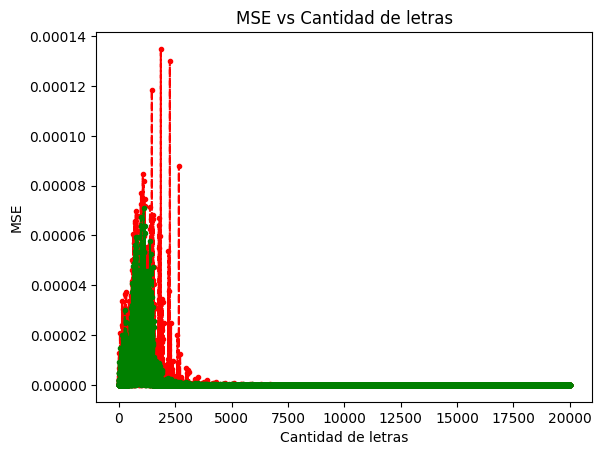

In [22]:
x = np.array([i for i in range(len(letras_train)*50)])
plt.plot(x,err_training, marker='.', linestyle='--', color='r')
plt.plot(x,err_validation, marker='.', linestyle='--', color='g')
plt.title('MSE vs Cantidad de letras')
plt.xlabel('Cantidad de letras')
plt.ylabel('MSE')
plt.show()

In [22]:
#VALIDATION   
for i in range(len(letras_train)):
    #Primer capa
    ys1 =[]
    for j in range(len(W1)):
        #Suma ponderada
        Z = np.dot(letras_train[i][0],W1[j])
        #Funcion de activacion
        ys1.append(lineal(Z+b1[j]))
         #print("Primer capa: ", ys1)

    #Segunda capa
    ys2 = []
    for j in range(len(W2)):
     #Suma ponderada
     Z = np.dot(ys1,W2[j])
     #Funcion de activacion
     ys2.append(lineal(Z+b2[j]))
     #print("2da capa: ", ys2)

    #Capa de salida
    ys3 = []
    for j in range(len(W3)):
     #Suma ponderada
     Z = np.dot(ys2,W3[j])
     #Funcion de activacion
     ys3.append(sigmoide(Z+b2[j]))
    #print("Capa salida: ", ys3)

    Ye = np.array(letras_train[i][1])
    er = np.sum([er, (Ye-ys3)**2], axis=0)
    er = er/(2*len(letras_train))
    err.append(er)

In [19]:

## PREDICT 
letra = ["b","d","f"]
porcentaje = 0
for i in range(len(letras_train)):
    ys1 =[]
    z1 = []
    for j in range(len(W1)):
                #Suma ponderada
        Z1 = np.dot(letras_train[i][0],W1[j])
                #Funcion de activacion
        ys1.append(lineal(Z1+b1[j]))
        z1.append(Z1)
                
    z1 = np.array(z1)
    ys1 = np.array(ys1)

    #print("Primer capa: ", ys1)
    #Segunda capa
    ys2 = []
    z2 = []
    for j in range(len(W2)):
        #Suma ponderada
        Z2 = np.dot(ys1,W2[j])
        #Funcion de activacion
        ys2.append(lineal(Z2+b2[j]))
        z2.append(Z2)
                
    z2 = np.array(z2)
    ys2 = np.array(ys2)

    #print("2da capa: ", ys2)
    #Capa de salida
    ys3 = []
    z3 = []
    for j in range(len(W3)):
        #Suma ponderada
        Z3 = np.dot(ys2,W3[j])
        #Funcion de activacion
        ys3.append(sigmoide(Z3+b3[j]))
        z3.append(Z3)
                #print("Capa salida: ", ys3)
                #!!-----Calculo del error-----!!!

    ys3 = np.array(ys3)
    z3 = np.array(z3)

    if(np.argmax(ys3) == np.argmax(letras_train[i][1])):
        porcentaje += 1
    print("Prediccion: {} letra: {} ---- valor real: {}, letra: {}".format( np.argmax(ys3)+1,letra[ np.argmax(ys3)],np.argmax(letras_train[i][1])+1,letra[np.argmax(letras_train[i][1])] ))
print("Porcentaje predicho: {}%".format((porcentaje/len(letras_train))*100))

Prediccion: 3 letra: f ---- valor real: 1, letra: b
Prediccion: 3 letra: f ---- valor real: 1, letra: b
Prediccion: 3 letra: f ---- valor real: 2, letra: d
Prediccion: 3 letra: f ---- valor real: 1, letra: b
Prediccion: 3 letra: f ---- valor real: 1, letra: b
Prediccion: 3 letra: f ---- valor real: 1, letra: b
Prediccion: 3 letra: f ---- valor real: 2, letra: d
Prediccion: 3 letra: f ---- valor real: 1, letra: b
Prediccion: 3 letra: f ---- valor real: 3, letra: f
Prediccion: 3 letra: f ---- valor real: 1, letra: b
Prediccion: 3 letra: f ---- valor real: 3, letra: f
Prediccion: 3 letra: f ---- valor real: 3, letra: f
Prediccion: 3 letra: f ---- valor real: 3, letra: f
Prediccion: 3 letra: f ---- valor real: 2, letra: d
Prediccion: 3 letra: f ---- valor real: 3, letra: f
Prediccion: 3 letra: f ---- valor real: 1, letra: b
Prediccion: 3 letra: f ---- valor real: 3, letra: f
Prediccion: 3 letra: f ---- valor real: 2, letra: d
Prediccion: 3 letra: f ---- valor real: 3, letra: f
Prediccion: 